```markdown
# Fitness Tracking Data Analysis

This Jupyter Notebook is designed to analyze and visualize data from a fitness tracking dataset. The dataset contains various attributes related to users' fitness activities, such as age, activity level, calories burned, app sessions, and distance traveled. 

The analysis includes:
- Loading and displaying the dataset.
- Cleaning and preprocessing the data.
- Generating descriptive statistics.
- Visualizing the data through histograms, boxplots, and correlation heatmaps.

The goal is to gain insights into users' fitness behaviors and identify patterns and correlations within the data.
```

In [2]:
import pandas as pd

# Read the data from the CSV file
fitness_tracking = pd.read_csv('../data/fitness_tracking.csv')

# Display the first few rows of the data
# print(fitness_tracking.head())

df = pd.DataFrame(fitness_tracking)
# info() method provides a concise summary of the data
print(df.info())
# describe() method provides a statistical summary of the data
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User ID                5 non-null      int64 
 1   Gender                 5 non-null      object
 2   Age                    5 non-null      int64 
 3   Activity Level         5 non-null      object
 4   Location               5 non-null      object
 5   App Sessions           5 non-null      int64 
 6   Distance Traveled(km)  5 non-null      int64 
 7   Calories Burned        5 non-null      int64 
dtypes: int64(5), object(3)
memory usage: 452.0+ bytes
None
        User ID       Age  App Sessions  Distance Traveled(km)  \
count  5.000000   5.00000      5.000000               5.000000   
mean   3.000000  31.60000    115.000000              55.000000   
std    1.581139   5.94138     60.207973              32.787193   
min    1.000000  25.00000     50.000000              20.000000   


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Strip any leading or trailing spaces from the column names
df.columns = df.columns.str.strip()

## Exploratory Data Analysis
Perform EDA(Exploratory Data Analysis) to understand distributions, correlations, and outliers. 
When dealing with a small dataset where most of the data points are centered around certain ages, you can take several steps to properly display the histogram and make it more informative:

1. Adjust Bin Sizes
You can adjust the bin sizes to better capture the distribution of the data. Smaller bins can provide more detail about the distribution.

2. Use Density Plot
A density plot (or kernel density estimate) can provide a smoother representation of the data distribution.

3. Add Data Points
Overlaying the actual data points on the histogram can help visualize the concentration of data points.



/var/folders/1k/jvyhg6t92v745x10cfh8vjkm0000gn/T/ipykernel_1656/1084661803.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


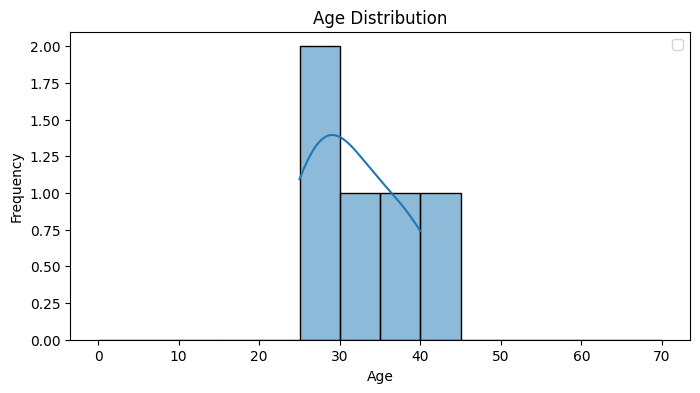

In [19]:
# Histogram of age distribution
# Define bin edges
bins = [0, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70]

plt.figure(figsize=(8, 4))

# plt.hist(df['Age'], bins=bins, edgecolor='black', alpha=0.7, label='Histogram')
# Overlay density plot
# sns.kdeplot(df['Age'], color='red', label='Density Plot')
# Add data points
# plt.scatter(df['Age'], [0.5] * len(df), color='black', alpha=0.5, label='Data Points')

sns.histplot(df['Age'], bins=bins, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the plot
plt.legend()
plt.show()

### Analysis
From the histogram, you can see that the sample of users is relatively small and mostly concentrated in the late 20s to early 30s range, with just one user in the 40-year-old range. Here are a few key observations:

1.	Concentration Around 30s: The tallest bars suggest that most data points lie between the mid-20s and mid-30s.
2.	Limited Age Range: There are no users younger than about 25 or older than 40 in this small sample, which indicates the dataset lacks broad age diversity.
3.	Small Sample Size: With only five data points, it’s difficult to make broad generalizations. Any patterns you see (e.g., a peak around age 30) should be interpreted cautiously.
4.	Implications for Analysis: If you’re trying to draw conclusions about user behavior by age, you would likely need a larger and more diverse dataset to capture the full range of possible age-related behaviors.

Overall, the histogram shows a narrow age distribution centered in the late 20s to early 30s, underscoring the importance of collecting more data if you want robust insights about different age groups.

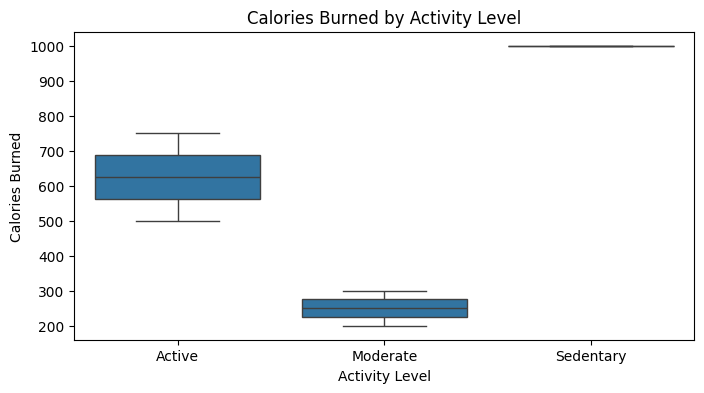

In [5]:
# Boxplot for Calories Burned grouped by Activity Level
plt.figure(figsize=(8, 4))
sns.boxplot(x='Activity Level', y='Calories Burned', data=df)
plt.title('Calories Burned by Activity Level')
plt.show()

### Analysis
From this boxplot comparing Calories Burned across Activity Level categories (Active, Moderate, Sedentary), here are the key takeaways:
1.	Highest Calorie Burn for ‘Sedentary’:
    - Surprisingly, the single Sedentary data point (1000 calories) is the highest in the dataset.
    - Because there is only one Sedentary user, the boxplot is just a single line rather than a box.
    - This suggests an outlier or an unusual case where the user labeled “Sedentary” is burning more calories than expected (possibly due to large distance traveled or more app sessions than typical for a sedentary profile).
2.	Active vs. Moderate:
    - The Active group shows a range roughly between 500 and 750 calories.
    - The Moderate group is between 200 and 300 calories.
    - This aligns more closely with the intuitive idea that “Active” users burn more calories than “Moderate” users.
3.	Small Sample Size:
    - With only two data points for Active, two for Moderate, and one for Sedentary, each “box” is not very robust—there isn’t much variability to show.
    - Outliers and single data points have a larger impact on the apparent distribution.
4.	Potential Data Inconsistency or Special Cases:
    - The unexpected high calorie burn in the Sedentary category could indicate a mislabeling or an unusual usage pattern. It might also reflect a single user who logs long sessions but is otherwise classified as “Sedentary.”
5.	Implications for Analysis:
    - Interpreting these results for broader conclusions is risky due to the small dataset.
    - A larger sample size would provide more reliable insights and might reveal whether that high-calorie Sedentary user is truly representative or just an anomaly.

In short, the boxplot shows that Active users tend to burn more calories than Moderate users, but the Sedentary group—represented by just one individual—shows an unusually high calorie burn, highlighting the need for more data or a closer examination of how these activity levels were assigned.

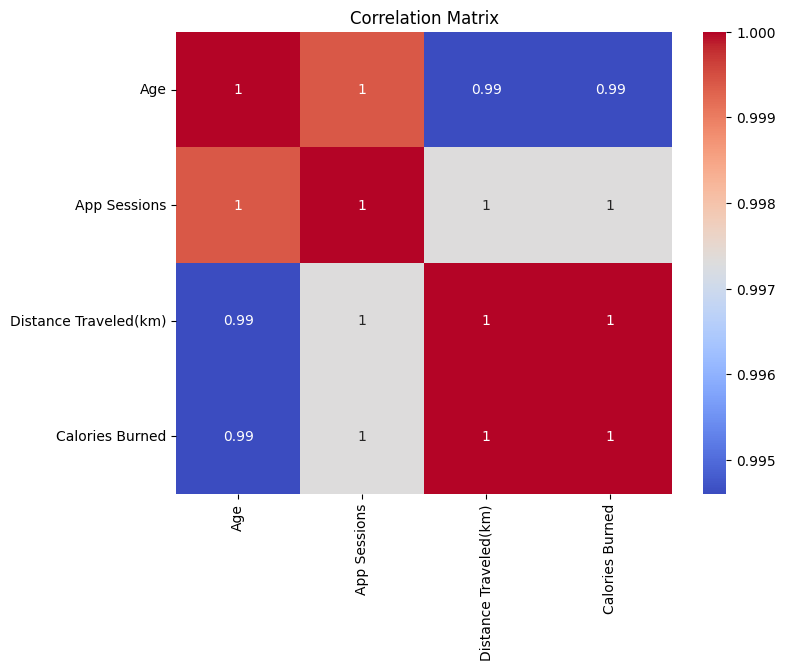

In [20]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age', 'App Sessions', 'Distance Traveled(km)', 'Calories Burned']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Analysis
From the heatmap, it appears that all four variables are very highly correlated with each other. Here’s what stands out:
1.	Extremely High Correlation Values
    - With a small dataset (only five data points), it’s not unusual to see inflated or misleading correlations.
    - For instance, a correlation coefficient of 0.99 or 1.00 suggests an almost perfect linear relationship, which is quite rare in real-world data unless the sample is extremely limited.
2.	Age vs. Distance Traveled and Calories Burned
    - The matrix suggests that older users (in this dataset) traveled more distance and burned more calories.
    - This might be a spurious relationship due to the very small sample size or a quirk of how the data was collected.
3.	App Sessions Correlations
    - App Sessions also appears to be strongly correlated with Distance Traveled and Calories Burned. This could mean that people who open the app more often also tend to log more distance and burn more calories—but again, the correlation may be overstated with so few data points.
4.	Small Sample Caveat
    - With only five records, it’s risky to generalize any strong conclusions. In real-world scenarios, you’d want a much larger dataset to confirm these relationships.
5.	Possible Next Steps
    - Gather more data to verify whether these high correlations hold true for a broader user population.
    - Investigate any potential confounding variables (e.g., a single user who skews the results because of unusually high distance traveled).

Overall, the heatmap suggests that variables like Age, Distance Traveled, Calories Burned, and App Sessions are all tightly linked—but these findings must be interpreted cautiously due to the very small sample size.

In [ ]:
# Advanced Statistical Techniques
# predict calories Burned based on App Sessions and Distance Traveled

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df[['App Sessions', 'Distance Traveled(km)']]
y = df['Calories Burned']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 8.077935669463161e-28
R2 Score: nan


/Users/jc/projects/cwq/coding-with-qiskit/miniconda3/envs/cwq/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Mean Squared Error: 8.077935669463161e-28
R2 Score: nan
/Users/jc/projects/cwq/coding-with-qiskit/miniconda3/envs/cwq/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## Explanation of the Issues
1. Small Dataset:
With only 5 entries, splitting the data into training and testing sets can result in very small test sets, which can lead to unreliable evaluation metrics.

2. R2 Score Warning:
The R2 score is not well-defined with less than two samples. This warning indicates that the test set is too small to calculate a meaningful R2 score.

3. Mean Squared Error (MSE):
The MSE value is extremely small (8.077935669463161e-28), which suggests that the model's predictions are almost identical to the actual values. This could be due to overfitting, especially with such a small dataset.

## Recommendations
To address these issues, consider the following steps:

1. Increase Dataset Size:
If possible, collect more data to increase the size of your dataset. This will provide more reliable evaluation metrics and improve the model's generalization.

2. Use Cross-Validation:
With small datasets, using cross-validation can provide more reliable evaluation metrics by averaging the results over multiple folds. This helps mitigate the issue of having too few samples in the test set.

3. Adjust Train-Test Split:
Ensure that the train-test split results in a sufficiently large test set. For very small datasets, consider using leave-one-out cross-validation (LOOCV).

In [35]:
# Leave-One-Out Cross-Validation

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score

# Example dataset with 5 rows
data = {
    'App_Sessions': [100, 50, 200, 150, 75],
    'Distance_Traveled': [50, 20, 100, 75, 30],
    'Calories_Burned': [500, 200, 1000, 750, 300]
}
df = pd.DataFrame(data)

X = df[['App_Sessions', 'Distance_Traveled']]
y = df['Calories_Burned']

loo = LeaveOneOut()
mse_scores = []
r2_scores = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    # For a single test sample, MSE is the squared error for that sample
    mse_scores.append(mean_squared_error([y_test], y_pred))
    
    # R² with a single test sample is not meaningful, but let's store it anyway
    try:
        r2_scores.append(r2_score([y_test], y_pred))
    except:
        r2_scores.append(None)

print("MSE scores per fold:", mse_scores)
print("Average MSE:", np.mean(mse_scores))
print("R2 scores per fold:", r2_scores)
# R² for single-sample test sets will be undefined or zero

MSE scores per fold: [1.2924697071141057e-26, 3.958188478036949e-26, 1.1632227364026952e-25, 1.2924697071141057e-26, 2.908056841006738e-26]
Average MSE: 4.21668241945977e-26
R2 scores per fold: [nan, nan, nan, nan, nan]


/Users/jc/projects/cwq/coding-with-qiskit/miniconda3/envs/cwq/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/jc/projects/cwq/coding-with-qiskit/miniconda3/envs/cwq/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/jc/projects/cwq/coding-with-qiskit/miniconda3/envs/cwq/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/jc/projects/cwq/coding-with-qiskit/miniconda3/envs/cwq/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

In [36]:
# k-Fold Cross-Validation

from sklearn.model_selection import KFold

kf = KFold(n_splits=3, shuffle=True, random_state=42)
mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

print("MSE scores:", mse_scores)
print("Average MSE:", np.mean(mse_scores))
print("R2 scores:", r2_scores)
print("Average R2:", np.mean(r2_scores))

MSE scores: [2600.0, 2.5849394142282115e-26, 1.2924697071141057e-26]
Average MSE: 866.6666666666666
R2 scores: [-0.040000000000000036, 1.0, nan]
Average R2: nan


/Users/jc/projects/cwq/coding-with-qiskit/miniconda3/envs/cwq/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


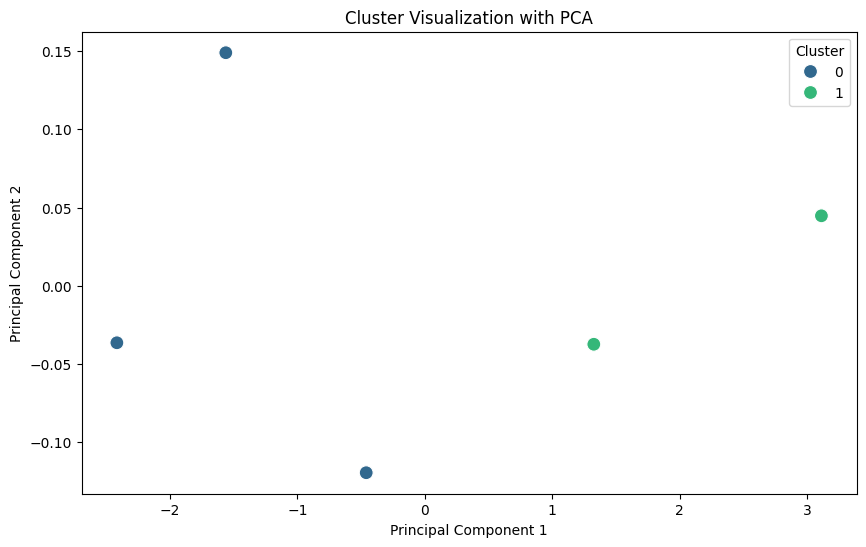

In [ ]:
# Clustering Analysis
# Clustering can reveal user segments based on their activity levels.
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select features for clustering
features = df[['Age', 'App Sessions', 'Distance Traveled(km)', 'Calories Burned']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means clustering (assuming 2 clusters for simplicity)
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

Interpretation
User ID 1: Assigned to Cluster 0
User ID 2: Assigned to Cluster 0
User ID 3: Assigned to Cluster 1
User ID 4: Assigned to Cluster 1
User ID 5: Assigned to Cluster 0
What Does It Mean to Have a User Assigned to a Cluster?
When a user is assigned to a cluster, it means that the K-Means algorithm has grouped this user with other users who have similar feature values. In this case, the features used for clustering are 'Age', 'App Sessions', 'Distance Traveled(km)', and 'Calories Burned'. Users within the same cluster share similar characteristics based on these features.

Practical Implications
User Segmentation:

The clustering results can be used for user segmentation. For example, users in Cluster 0 might represent a group with similar activity levels, age ranges, and app usage patterns, while users in Cluster 1 might represent a different group with distinct characteristics.
Targeted Marketing:

Businesses can use clustering results to create targeted marketing campaigns. For instance, different promotional strategies can be designed for each cluster based on their unique characteristics.
Personalized Recommendations:

Clustering can help in providing personalized recommendations. For example, users in the same cluster might receive similar product or service recommendations based on their shared characteristics.
Improved User Experience:

Understanding the different user clusters can help in tailoring the user experience to better meet the needs and preferences of each group.
Summary
The clustering analysis has divided the users into two distinct groups (clusters) based on their age, app sessions, distance traveled, and calories burned. Users with similar feature values are grouped together, allowing for better understanding and analysis of user behavior and characteristics. This information can be used for various practical applications, such as user segmentation, targeted marketing, personalized recommendations, and improving user experience.

